# IT Academy - Data Science with Python
## Sprint 8: Hypothesis Testing
### [Github Hypothesis Testing](https://github.com/jesussantana/Hypothesis-testing)

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
[![wakatime](https://wakatime.com/badge/github/jesussantana/Hypothesis-testing.svg)](https://wakatime.com/badge/github/jesussantana/Hypothesis-testing)

In [1]:
#%pip install statsmodels
#%pip install researchpy

In [2]:
import pandas as pd 
import numpy as np
import scipy as sp
import datetime
import warnings
import time
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy.stats import ttest_1samp,ttest_ind
from scipy.stats import normaltest
from scipy.stats import f_oneway
import researchpy as rp

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

mpl.style.use('ggplot')
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='deep')
sns.set(rc={'figure.figsize':(12,6)})

In [3]:
np.random.seed(20180701+3)

### Exercise 1: 
  - Grab a sports theme dataset you like and select an attribute from the dataset. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.

In [4]:
pd.set_option('display.max_columns', None)

path = '../data/'
file = 'raw/MLB_Stats.csv'

df_raw = pd.read_csv(path+file)

In [5]:
df_raw.head()

playerID    Player Name  weight  height bats throws  Season League teamID  \
0  aardsda01  David Aardsma     215      75    R      R    2004     NL    SFN   
1  aardsda01  David Aardsma     215      75    R      R    2007     AL    CHA   
2  aardsda01  David Aardsma     215      75    R      R    2008     AL    BOS   
3  aardsda01  David Aardsma     215      75    R      R    2009     AL    SEA   
4  aardsda01  David Aardsma     215      75    R      R    2012     AL    NYA   

                   Team             Franchise   G  AB  R  H  2B  3B  HR  RBI  \
0  San Francisco Giants  San Francisco Giants  11   0  0  0   0   0   0    0   
1     Chicago White Sox     Chicago White Sox  25   0  0  0   0   0   0    0   
2        Boston Red Sox        Boston Red Sox  47   1  0  0   0   0   0    0   
3      Seattle Mariners      Seattle Mariners  73   0  0  0   0   0   0    0   
4      New York Yankees      New York Yankees   1   0  0  0   0   0   0    0   

   SB  BB  SO  salary  IBB  HBP  SH  SF  PA  
0   0   0   0  300000    0    0   0   0   0  
1   0   0   0  387500    0    0   0   0   0  
2   0   0   1  403250    0    0   0   0   1  
3   0   0   0  419000    0    0   0   0   0  
4   0   0   0  500000    0    0   0   0   0

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28293 entries, 0 to 28292
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   playerID     28293 non-null  object
 1   Player Name  28293 non-null  object
 2   weight       28293 non-null  int64 
 3   height       28293 non-null  int64 
 4   bats         28293 non-null  object
 5   throws       28293 non-null  object
 6   Season       28293 non-null  int64 
 7   League       28293 non-null  object
 8   teamID       28293 non-null  object
 9   Team         28293 non-null  object
 10  Franchise    28293 non-null  object
 11  G            28293 non-null  int64 
 12  AB           28293 non-null  int64 
 13  R            28293 non-null  int64 
 14  H            28293 non-null  int64 
 15  2B           28293 non-null  int64 
 16  3B           28293 non-null  int64 
 17  HR           28293 non-null  int64 
 18  RBI          28293 non-null  int64 
 19  SB           28293 non-nu

In [7]:
df_raw.shape

(28293, 28)

In [8]:
df_raw.describe().round(3)

weight     height     Season          G         AB          R  \
count  28293.000  28293.000  28293.000  28293.000  28293.000  28293.000   
mean     199.049     73.500   2000.938     63.934    161.880     21.787   
std       22.654      2.287      8.901     47.285    199.407     30.134   
min      140.000     66.000   1985.000      1.000      0.000      0.000   
25%      185.000     72.000   1994.000     26.000      1.000      0.000   
50%      195.000     74.000   2001.000     50.000     57.000      4.000   
75%      215.000     75.000   2009.000    101.000    298.000     37.000   
max      315.000     83.000   2016.000    163.000    716.000    152.000   

               H         2B         3B         HR        RBI         SB  \
count  28293.000  28293.000  28293.000  28293.000  28293.000  28293.000   
mean      42.625      8.221      0.909      4.777     20.784      3.108   
std       56.201     11.401      1.832      8.384     29.705      7.495   
min        0.000      0.000      0.000      0.000      0.000      0.000   
25%        0.000      0.000      0.000      0.000      0.000      0.000   
50%       10.000      2.000      0.000      0.000      4.000      0.000   
75%       76.000     14.000      1.000      6.000     34.000      2.000   
max      262.000     59.000     23.000     73.000    165.000    110.000   

              BB         SO        salary        IBB        HBP         SH  \
count  28293.000  28293.000  2.829300e+04  28293.000  28293.000  28293.000   
mean      15.802     30.376  2.112965e+06      1.326      1.451      1.535   
std       23.036     37.624  3.440239e+06      3.161      2.782      2.748   
min        0.000      0.000  1.090000e+04      0.000      0.000      0.000   
25%        0.000      0.000  3.000000e+05      0.000      0.000      0.000   
50%        3.000     15.000  6.000000e+05      0.000      0.000      0.000   
75%       25.000     50.000  2.425000e+06      1.000      2.000      2.000   
max      232.000    223.000  3.300000e+07    120.000     35.000     39.000   

              SF         PA  
count  28293.000  28293.000  
mean       1.367    183.360  
std        2.208    226.217  
min        0.000      0.000  
25%        0.000      1.000  
50%        0.000     66.000  
75%        2.000    337.000  
max       17.000    783.000

In [9]:
corr = df_raw.corr()
corr.style.background_gradient(cmap="magma")

In [10]:
df_raw.Season.unique()

array([2004, 2007, 2008, 2009, 2012, 2010, 1989, 1986, 1987, 1988, 2006,
       2011, 2014, 2015, 2016, 1998, 1999, 2000, 2001, 1990, 1991, 1992,
       1996, 1993, 1994, 1995, 1997, 2002, 2003, 2005, 2013, 1985])

In [11]:
type(df_raw.Season)

pandas.core.series.Series

## Salary the  21 century

In [12]:
group = df_raw.groupby('Season')
group.Season.count() 

Season
1985     577
1986     775
1987     673
1988     707
1989     768
1990     892
1991     718
1992     795
1993     977
1994     899
1995    1096
1996    1018
1997    1013
1998    1094
1999    1067
2000     930
2001     915
2002     889
2003     896
2004     877
2005     880
2006     913
2007     899
2008     887
2009     880
2010     877
2011     881
2012     907
2013     892
2014     882
2015     918
2016     901
Name: Season, dtype: int64

In [13]:
df_raw.groupby('Season').mean().round(3)

weight  height       G       AB       R       H     2B     3B     HR  \
Season                                                                          
1985    187.023  73.319  77.839  209.284  27.003  54.678  9.636  1.418  5.532   
1986    187.723  73.329  69.200  177.621  23.234  46.062  8.147  1.079  4.846   
1987    187.481  73.300  70.114  184.178  25.620  48.945  8.750  1.120  5.912   
1988    187.521  73.334  69.878  186.204  22.768  47.612  8.436  1.098  4.256   
1989    187.988  73.352  68.521  177.423  21.764  45.529  7.893  1.096  3.900   
1990    187.771  73.358  59.614  149.899  18.849  38.824  6.904  0.914  3.490   
1991    188.783  73.428  68.036  171.235  21.883  44.153  7.922  1.102  4.187   
1992    189.169  73.399  66.166  167.240  20.522  43.031  7.801  0.987  3.664   
1993    190.161  73.431  60.757  153.821  20.762  40.991  7.401  0.930  4.039   
1994    189.707  73.446  47.309  121.113  17.333  32.766  6.304  0.774  3.655   
1995    190.259  73.331  51.139  125.310  17.749  33.521  6.321  0.749  3.712   
1996    191.532  73.458  60.836  151.283  22.095  40.917  7.707  0.821  4.847   
1997    191.589  73.395  60.513  149.705  20.861  40.074  7.742  0.852  4.512   
1998    193.416  73.505  60.786  151.062  21.068  40.345  7.945  0.807  4.602   
1999    194.189  73.516  62.298  154.055  22.839  41.930  8.081  0.868  5.118   
2000    194.256  73.430  64.226  163.299  24.644  44.562  8.811  0.925  5.710   
2001    195.728  73.471  64.831  165.550  23.337  44.030  8.898  0.918  5.564   
2002    197.323  73.404  67.101  169.364  23.102  44.496  8.971  0.925  5.258   
2003    198.720  73.415  65.898  167.074  23.173  44.440  8.951  0.923  5.334   
2004    201.094  73.457  66.684  170.444  24.122  45.745  9.173  0.904  5.699   
2005    202.230  73.516  66.605  170.142  22.964  45.292  9.167  0.914  5.220   
2006    205.284  73.517  64.268  164.636  23.417  44.587  9.059  0.917  5.405   
2007    207.568  73.618  66.367  166.719  23.190  44.864  9.209  0.897  5.000   
2008    209.573  73.627  65.816  166.557  22.755  44.211  9.057  0.876  5.002   
2009    211.507  73.677  65.714  167.712  22.934  44.390  8.942  0.934  5.255   
2010    212.699  73.689  65.258  163.780  21.344  42.480  8.461  0.838  4.716   
2011    214.497  73.728  65.036  164.199  20.798  42.154  8.405  0.863  4.721   
2012    213.875  73.638  64.015  159.477  20.459  40.880  8.079  0.857  4.864   
2013    213.642  73.687  63.825  160.840  19.895  41.100  8.021  0.744  4.655   
2014    213.337  73.637  65.841  165.766  19.918  41.912  8.261  0.830  4.295   
2015    213.208  73.646  62.741  155.619  19.472  39.782  7.798  0.843  4.649   
2016    212.538  73.797  64.121  160.467  21.372  41.323  8.071  0.824  5.593   

           RBI     SB      BB      SO       salary    IBB    HBP     SH  \
Season                                                                    
1985    25.903  4.676  20.612  31.522   479950.120  2.029  1.026  2.092   
1986    21.867  4.110  17.795  30.476   418065.205  1.622  1.014  1.840   
1987    24.438  4.606  18.871  31.603   431524.253  1.786  1.085  1.764   
1988    21.556  4.291  17.260  30.178   461340.283  1.850  1.211  2.052   
1989    20.392  3.914  16.884  29.031   504376.475  1.836  0.996  1.973   
1990    17.823  3.417  14.524  24.705   529659.436  1.467  0.904  1.628   
1991    20.935  3.597  16.891  28.504   886694.642  1.543  1.086  1.918   
1992    19.323  3.860  16.278  27.107  1078034.791  1.615  1.161  1.835   
1993    19.612  3.296  15.036  25.766   990444.696  1.508  1.189  1.788   
1994    16.434  2.478  12.260  21.595  1043881.369  1.120  0.968  1.313   
1995    16.743  2.664  12.915  22.962   969538.947  1.007  1.109  1.336   
1996    20.936  3.190  15.659  28.227  1004264.302  1.313  1.355  1.473   
1997    19.837  3.185  15.157  28.701  1224189.777  1.144  1.398  1.499   
1998    20.061  2.958  14.926  28.622  1310546.337  0.973  1.441  1.525   
1999    21.704  3.164  16.565  28.505  1481933.507  1.

In [14]:
print(round(df_raw.mean(), 3))

weight        199.049
height         73.500
Season       2000.938
G              63.934
AB            161.880
R              21.787
H              42.625
2B              8.221
3B              0.909
HR              4.777
RBI            20.784
SB              3.108
BB             15.802
SO             30.376
salary    2112965.467
IBB             1.326
HBP             1.451
SH              1.535
SF              1.367
PA            183.360
dtype: float64


In [15]:
df_21_century = df_raw.where(df_raw['Season'] >= 2000)

In [16]:
df_21_century.head()

playerID    Player Name  weight  height bats throws  Season League teamID  \
0  aardsda01  David Aardsma   215.0    75.0    R      R  2004.0     NL    SFN   
1  aardsda01  David Aardsma   215.0    75.0    R      R  2007.0     AL    CHA   
2  aardsda01  David Aardsma   215.0    75.0    R      R  2008.0     AL    BOS   
3  aardsda01  David Aardsma   215.0    75.0    R      R  2009.0     AL    SEA   
4  aardsda01  David Aardsma   215.0    75.0    R      R  2012.0     AL    NYA   

                   Team             Franchise     G   AB    R    H   2B   3B  \
0  San Francisco Giants  San Francisco Giants  11.0  0.0  0.0  0.0  0.0  0.0   
1     Chicago White Sox     Chicago White Sox  25.0  0.0  0.0  0.0  0.0  0.0   
2        Boston Red Sox        Boston Red Sox  47.0  1.0  0.0  0.0  0.0  0.0   
3      Seattle Mariners      Seattle Mariners  73.0  0.0  0.0  0.0  0.0  0.0   
4      New York Yankees      New York Yankees   1.0  0.0  0.0  0.0  0.0  0.0   

    HR  RBI   SB   BB   SO    salary  IBB  HBP   SH   SF   PA  
0  0.0  0.0  0.0  0.0  0.0  300000.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  387500.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  1.0  403250.0  0.0  0.0  0.0  0.0  1.0  
3  0.0  0.0  0.0  0.0  0.0  419000.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  500000.0  0.0  0.0  0.0  0.0  0.0

In [17]:
# Create a New Dataset with variables of interest

df_21_century_sample = df_21_century[['Player Name', 'Team','Season', 'R', 'H', 'salary']]

In [18]:
# Selecting the dataset rows of interest
df_21_century_sample.head()

Player Name                  Team  Season    R    H    salary
0  David Aardsma  San Francisco Giants  2004.0  0.0  0.0  300000.0
1  David Aardsma     Chicago White Sox  2007.0  0.0  0.0  387500.0
2  David Aardsma        Boston Red Sox  2008.0  0.0  0.0  403250.0
3  David Aardsma      Seattle Mariners  2009.0  0.0  0.0  419000.0
4  David Aardsma      New York Yankees  2012.0  0.0  0.0  500000.0

In [19]:
df_21_century_sample.shape

(28293, 6)

In [20]:
salary = df_21_century_sample.salary
salary.shape

(28293,)

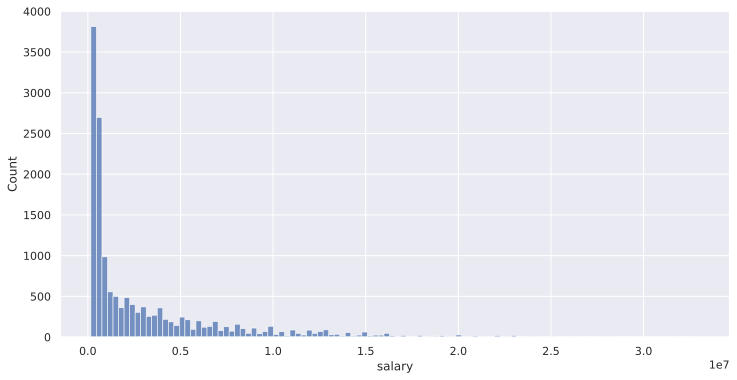

In [21]:
sns.histplot(salary)
mean_population = salary.mean()

- Salary not follow a normal distribution

In [22]:
# Getting mean of the samples

means_salary = []

for i in range(10000):
    # take a sample of 500 values
    salary_samples= salary.sample(n=500, replace=True)
    means_salary.append(salary_samples.mean())

<AxesSubplot:ylabel='Count'>

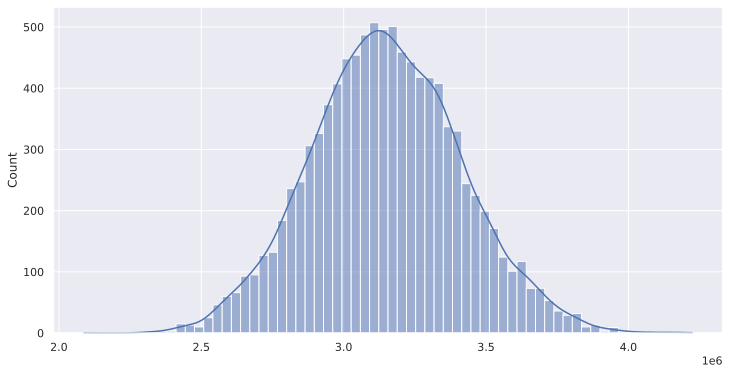

In [23]:
sns.histplot(means_salary,kde=True,line_kws={'color': 'red'})

- mean_salary does follow a normal distribution

In [24]:
print(f'Mean salary population is {round(mean_population,2)}')
print(f'Mean salary of samples mean is {round(np.mean(means_salary),2)}')

Mean salary population is 3150616.16
Mean salary of samples mean is 3149918.72


In [25]:
#Test will tell us whether means of the sample and the population are different
#A one sample t-test is used to test whether or not the mean of a population is equal to some value.

res= ttest_1samp(a=means_salary, popmean=mean_population)
print(res)

Ttest_1sampResult(statistic=-0.26582375841924977, pvalue=0.7903804252389379)


In [26]:
alpha = 0.05    
print(f'P-value is {round(res.pvalue*100,2)}% and significance level (alpha) is 5% ')
if res.pvalue < alpha:
    print('reject NULL hypothesis')
else:
    print('cannot reject NULL hypothesis')

P-value is 79.04% and significance level (alpha) is 5% 
cannot reject NULL hypothesis


- Since P-value > alpha we cannot rule out the null hypothesis that the population mean is equal to the sample mean
- In that case the null hypothesis is valid: the sample mean is equal to the population mean (we already expected it from the central limit theorem)

### Exercise 2: 
  - Continue with the sports theme dataset you like and select two attributes from the dataset. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.

## Boston vs Dodgers Salary

In [27]:
df_21_century_sample.Team.value_counts()

Boston Red Sox                   575
Los Angeles Dodgers              555
New York Yankees                 544
San Diego Padres                 532
Texas Rangers                    524
Colorado Rockies                 520
Pittsburgh Pirates               517
Philadelphia Phillies            516
Arizona Diamondbacks             513
Chicago Cubs                     512
Cleveland Indians                512
New York Mets                    511
Kansas City Royals               508
Oakland Athletics                508
San Francisco Giants             508
St. Louis Cardinals              507
Baltimore Orioles                507
Toronto Blue Jays                503
Atlanta Braves                   501
Cincinnati Reds                  495
Milwaukee Brewers                492
Chicago White Sox                483
Detroit Tigers                   482
Seattle Mariners                 475
Houston Astros                   469
Minnesota Twins                  462
Florida Marlins                  363
W

Median salary for Boston Red Sox: 4460546.88


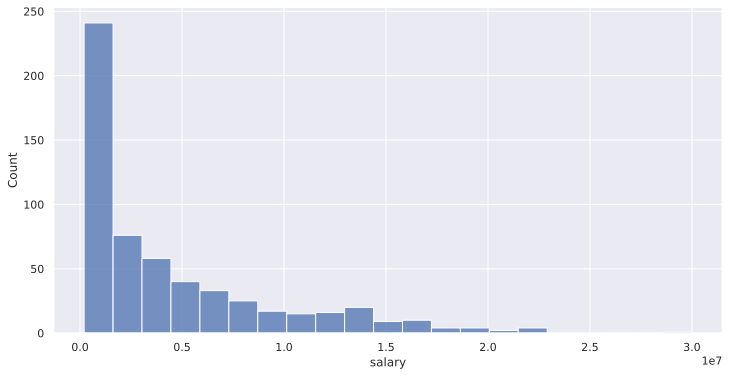

In [28]:
Boston_salary = df_21_century_sample[df_21_century_sample.Team == 'Boston Red Sox'].salary
sns.histplot(Boston_salary)
print(f'Median salary for Boston Red Sox: %.2f' %Boston_salary.mean())

Median salary for Los Angeles Dodgers  is 4544206.27


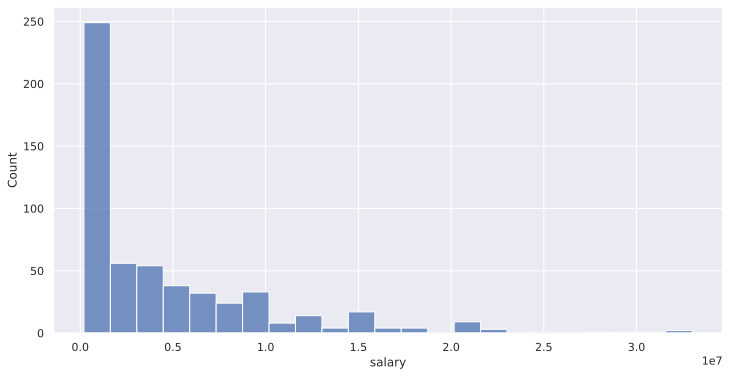

In [29]:
Dodgers_salary = df_21_century_sample[df_21_century_sample.Team == 'Los Angeles Dodgers'].salary
sns.histplot(Dodgers_salary)
print(f'Median salary for Los Angeles Dodgers  is %.2f' %Dodgers_salary.mean())

In [30]:
res = ttest_ind(a = Boston_salary, b = Dodgers_salary)
print(res)

Ttest_indResult(statistic=-0.26842838616558395, pvalue=0.7884186736058304)


In [31]:
print(f'P-value is {round(res.pvalue*100,2)}% and significance level (alpha) is 5% ')

P-value is 78.84% and significance level (alpha) is 5% 


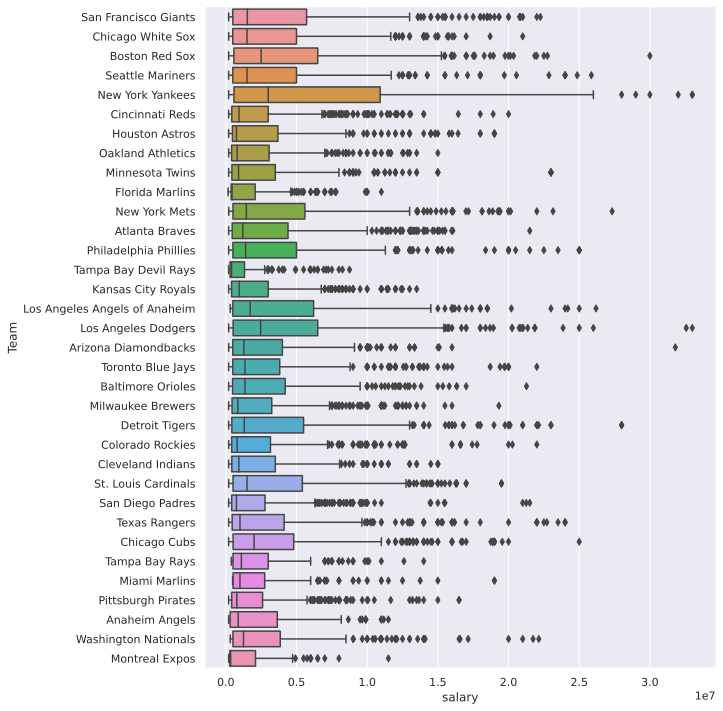

In [32]:
#### Searching outlier in the data

chart =sns.catplot(y='Team', x='salary', data = df_21_century_sample, kind='box', orient='horizontal', height=10)


### Hits vs Runs Scored

In [33]:
ax = sns.jointplot(df_raw.H, df_raw.R)
ax.set_axis_labels('Hits', 'Runs Scored')
plt.show()

In [34]:
dfReg = df_raw[['H', 'R']]
dfReg.std().round(2)

H    56.20
R    30.13
dtype: float64

In [35]:
dfReg.corr().round(3)

H      R
H  1.000  0.974
R  0.974  1.000

In [36]:
# select the point (x,y)

dfReg.mean().round(2)

H    42.62
R    21.79
dtype: float64

In [37]:
x = dfReg.H
y = dfReg.R

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("intercept: %f;  slope: %f;  std. error: %f  p-value: %f;  R value: %f; R-square: %f." % 
      (intercept, slope, std_err, p_value, r_value, r_value**2))

intercept: -0.471762;  slope: 0.522202;  std. error: 0.000723  p-value: 0.000000;  R value: 0.973927; R-square: 0.948533.


In [38]:
plt.plot(x, y, 'o', label='original data',color='darkblue')
plt.plot(x, intercept + slope * x, 'r', label='fitted line') # equation 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥
plt.legend()
plt.title('Hits vs Runs Scored')
plt.ylabel('% of Hits')
plt.xlabel('% of Units in Runs Scored')
plt.show()

- Splitting the dataset into Train and Test sets

In [39]:
X = df_raw.H.values.reshape(-1,1)
y = df_raw.R.values.reshape(-1,1)

In [40]:
X

array([[ 0],
       [ 0],
       [ 0],
       ...,
       [69],
       [16],
       [ 0]])

- we split 80% of the data to the training set while 20% of the data to the test set using below code.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22634, 1), (5659, 1), (22634, 1), (5659, 1))

In [43]:
pearson_coef, p_value = stats.pearsonr(df_raw.H, df_raw.R)

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9739265482859993  with a P-value of P = 0.0


- Conclusion:
Since the p-value is < 0.001, the correlation between Hits and Runs Scored is statistically significant, although the linear relationship is extremely strong (~0.973)

### Exercise 3: 
- Continue with the sports theme dataset you like and select three attributes from the dataset. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.

### Hits & Runs Scored vs Salary

In [44]:
population = df_raw[['H', 'R', 'salary']]
population

H   R  salary
0        0   0  300000
1        0   0  387500
2        0   0  403250
3        0   0  419000
4        0   0  500000
...    ...  ..     ...
28288    4   3  100000
28289  108  46  109000
28290   69  40  222000
28291   16  10  145000
28292    0   0  511000

[28293 rows x 3 columns]

In [45]:
k = 1000
sample = population.sample(k)
sample.shape

(1000, 3)

In [46]:
sample = sample.sort_values(by= 'salary')

In [47]:
sample.head()

H   R  salary
20671   45  26   60000
4929     0   0   60000
25182    0   0   60000
19386    0   0   60000
24633  118  50   62500

In [48]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 20671 to 7718
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   H       1000 non-null   int64
 1   R       1000 non-null   int64
 2   salary  1000 non-null   int64
dtypes: int64(3)
memory usage: 31.2 KB


Text(0.5, 0, 'SAMPLE - Salary')

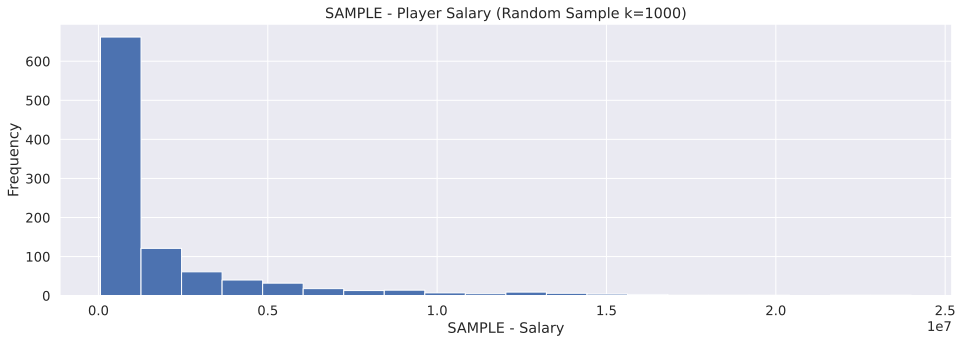

In [53]:
k = 20
sns.set(rc={'figure.figsize':(16,5)}, font_scale=1.2)
plt.hist(sample.salary, bins= k)
plt.title('SAMPLE - Player Salary (Random Sample k=1000)')
plt.ylabel('Frequency')
plt.xlabel('SAMPLE - Salary')

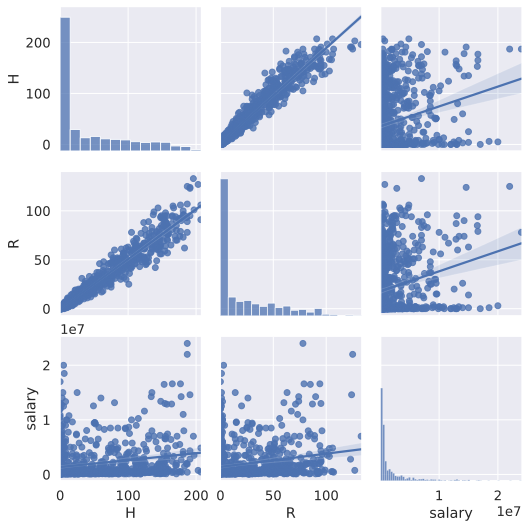

In [54]:
sns.pairplot(sample, kind="reg")
plt.show()

In [55]:
data1 = sample['salary']
data2 = sample['H']
data3 = sample['R']
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=373.816, p=0.000
Probably different distributions


- Conclusion:
The P in this case is 0, therefore P < 0.05: It seems that there is a dependency between the samples taken